# Part 1

## Contents

### Import libraries
### Import files
### Data Check
### Q5: Marketing Profile Variables
### Q6: Marketing Profile Visualisations
### Q7: Descriptive Statistics
### Q8: Region and Deaprtment Profile and visualisations
### Final dataset Export

## Import libraries 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Files

In [2]:
#Turned folder path into string 
path= r'/Users/pamnouboussi/27.05.23 Instacart Basket Analysis'

In [3]:
#Import high customer activity data with PII information dropped for analysis
all_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_orders_products_customers_high_activity.pkl'))

## Data check

In [4]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 36 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   Unnamed: 0_x                  int64   
 1   order_id                      int64   
 2   user_id                       int64   
 3   order_number                  int64   
 4   orders_day_of_week            int64   
 5   order_hour_of_day             int64   
 6   days_since_last_order         float64 
 7   product_id                    int64   
 8   add_to_cart_order             int64   
 9   reordered                     int64   
 10  Unnamed: 0_y                  int64   
 11  product_name                  object  
 12  aisle_id                      int64   
 13  department_id                 int64   
 14  prices                        float64 
 15  exists                        category
 16  busiest_day                   object  
 17  Busiest_days                  object  
 18  

In [5]:
# configure pandas to display all columns
pd.set_option('display.max_column', None)

In [6]:
all_merged.rename(columns={"low_activity_flag": "activity_flag"})

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,exists,busiest_day,Busiest_days,Task_Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_last_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,mix,region,activity_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,1768141,3308056,106143,22,4,20,10.0,19675,1,1,19676,Organic Raspberry Black Tea,94,7,10.7,both,Least busy,Least busy,Least busy days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,Gerald,West,high-activity customer
32404851,1768142,2988973,106143,23,2,22,5.0,19675,1,1,19676,Organic Raspberry Black Tea,94,7,10.7,both,Regularly busy,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,Gerald,West,high-activity customer
32404852,1768143,930,106143,24,6,12,4.0,19675,1,1,19676,Organic Raspberry Black Tea,94,7,10.7,both,Regularly busy,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,Gerald,West,high-activity customer
32404853,1768144,467253,106143,25,6,16,7.0,19675,1,1,19676,Organic Raspberry Black Tea,94,7,10.7,both,Regularly busy,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,Gerald,West,high-activity customer


## Q5. Marketing Profile Variables
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Customer Profiles

### Age

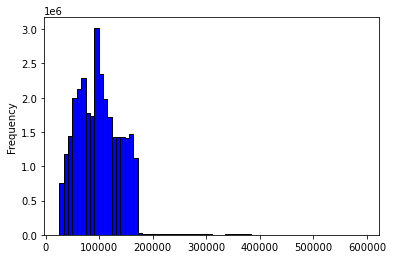

In [7]:
# investigating age distribution amosgnt clients
age_frequency_hist = all_merged['income'].plot.hist(bins = 70, color = ['blue'] , ec = 'black')

There was no meaningful distributioon in age. I will create age ranges based on those comonly used in marketing strategies

In [8]:
# Creating an Age_profile
all_merged.loc[all_merged['age'] <= 34, 'age_group'] = 'Young Adults'
all_merged.loc[(all_merged['age'] > 34) & (all_merged['age'] < 55), 'age_group'] = 'Middle-aged Adults'
all_merged.loc[all_merged['age'] >= 55, 'age_group'] = 'Senior Adults'

In [9]:
#frequency check for new flag
all_merged['age_group'].value_counts(dropna = False)

Senior Adults         12998031
Middle-aged Adults     9724238
Young Adults           8242295
Name: age_group, dtype: int64

In [10]:
all_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,exists,busiest_day,Busiest_days,Task_Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_last_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,mix,region,low_activity_flag,age_group
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults


### Income

In [11]:
#viewing descriptive statistics customer for income
all_merged['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

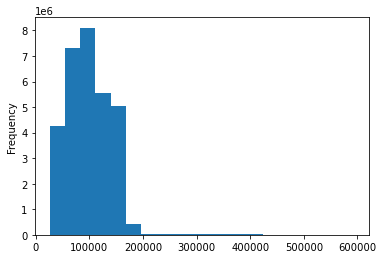

In [12]:
hist_inc = all_merged['income'].plot.hist(bins = 20)

In [13]:
#Creating income group
all_merged.loc[all_merged['income'] < 40000, 'income_group'] = 'Low-income'
all_merged.loc[(all_merged['income'] >= 40000) & (all_merged['income'] < 75000), 'income_group'] = 'Moderate-income'
all_merged.loc[(all_merged['income'] >= 75000) & (all_merged['income'] < 180000), 'income_group'] = 'High-income'
all_merged.loc[all_merged['income'] >= 180000, 'income_group'] = 'Affluent'

In [14]:
# Frequency ccounts

all_merged['income_group'].value_counts(dropna = False)

High-income        20767000
Moderate-income     8294655
Low-income          1612025
Affluent             290884
Name: income_group, dtype: int64

In [15]:
all_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,exists,busiest_day,Busiest_days,Task_Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_last_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,mix,region,low_activity_flag,age_group,income_group
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income


### Family status and number of dependants

In [16]:
# create a crosstabof marital status and dependents
crsstab_marital_dependants = pd.crosstab(all_merged['fam_status'], all_merged['n_dependants'], dropna = False)

crsstab_marital_dependants

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [17]:
# create family_group for each customer: 
# label customer as "Single no dependants" where ('family status' in (divorced/widowed, living with parents and siblings, single)) & (n_dependants == 0)
all_merged.loc[(all_merged['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (all_merged['n_dependants']==0), 'family_group'] = 'Single no dependants'

# label customer as "Single with dependants" where ('family status' in (divorced/widowed, living with parents and siblings, single)) & (n_dependants >= 1)
all_merged.loc[(all_merged['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (all_merged['n_dependants'] >=1), 'family_group'] = 'Single with dependants'

# label customer as "Married no dependants" (assumption 1 dependant is a spouse) where ('family status' == 'married') & (n_dependants == 1)
all_merged.loc[(all_merged['fam_status'] == 'married') & (all_merged['n_dependants'] == 1), 'family_group'] = 'Married no dependants'

# label customer as "Married with dependants" where ('family_status' == 'married') & (n_dependants > 1)
all_merged.loc[(all_merged['fam_status'] == 'married') & (all_merged['n_dependants'] > 1), 'family_group'] = 'Married with dependants'

In [18]:
# frequency count
all_merged['family_group'].value_counts(dropna = False)

Married with dependants    14532650
Single no dependants        7739681
Married no dependants       7211061
Single with dependants      1481172
Name: family_group, dtype: int64

### Department ID segments

In [19]:
# Creating a crosstab between Department_ID and User_ID

depid_userid_crosstb = pd.crosstab(all_merged['department_id'], all_merged['user_id'], dropna = False)

In [20]:
all_merged['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

The names for each department are as follow:
1 (frozen), 2 (other), 3 (bakery), 4 (produce), 7 (beverages), 9 (dry goods pasta), 10 (bulk), 11 (personal care), 12 (meat seafood), 13 (pantry), 14 (breakfast), 15 (canned goods), 16 (dairy eggs), 17 (household), 19 (snacks), 21 (missing), 8 (pets),18 (babies), 5 (alcohol), 6 (international), 20 (deli)

### What are the most purchased items by each family group?

In [21]:
# create a new dataframe to calculate the frequency of purchases from each department for each customer type
cust_dept_fam = all_merged.groupby(['family_group', 'department_id',]).size().reset_index(name = 'product_count')

In [22]:
#frequency table
cust_dept_fam.value_counts(dropna = False)

family_group             department_id  product_count
Married no dependants    1              490333           1
Single no dependants     12             165878           1
                         20             253382           1
                         19             690438           1
                         18             103328           1
                                                        ..
Married with dependants  6              118700           1
                         5              66171            1
                         4              4262296          1
                         3              523567           1
Single with dependants   21             3317             1
Length: 84, dtype: int64

In [23]:
cust_dept_fam

,family_group,department_id,product_count
0,Married no dependants,1,490333
1,Married no dependants,2,8137
2,Married no dependants,3,262182
3,Married no dependants,4,2110997
4,Married no dependants,5,33250
...,...,...,...
79,Single with dependants,17,33349
80,Single with dependants,18,19381
81,Single with dependants,19,131310
82,Single with dependants,20,48119


### Age: What are the most purchased items by each age group?

In [24]:
# create a new dataframe to calculate the frequency of purchases from each department for each customer
cust_dept_age = all_merged.groupby(['age_group', 'department_id',]).size().reset_index(name = 'product_count')

In [25]:
cust_dept_age.value_counts(dropna = False)

age_group           department_id  product_count
Middle-aged Adults  1              666098           1
Young Adults        6              69101            1
Senior Adults       14             279636           1
                    15             423707           1
                    16             2165648          1
                                                   ..
                    6              106093           1
                    7              1088068          1
                    8              39245            1
                    9              344752           1
Young Adults        21             17753            1
Length: 63, dtype: int64

In [26]:
cust_dept_age

,age_group,department_id,product_count
0,Middle-aged Adults,1,666098
1,Middle-aged Adults,2,10660
2,Middle-aged Adults,3,352133
3,Middle-aged Adults,4,2851697
4,Middle-aged Adults,5,45055
...,...,...,...
58,Young Adults,17,184372
59,Young Adults,18,107300
60,Young Adults,19,740226
61,Young Adults,20,266470


### What type of products are bought by each income group?

In [27]:
# create a new dataframe to calculate the frequency of purchases from each department for each customer
cust_dept_income = all_merged.groupby(['income_group', 'department_id',]).size().reset_index(name = 'product_count')

In [28]:
cust_dept_income.value_counts(dropna = False)

income_group     department_id  product_count
Affluent         1              23034            1
Low-income       12             12907            1
                 20             51355            1
                 19             292144           1
                 18             12547            1
                                                ..
High-income      6              177383           1
                 5              92969            1
                 4              6244622          1
                 3              764848           1
Moderate-income  21             17684            1
Length: 84, dtype: int64

In [29]:
cust_dept_income

,income_group,department_id,product_count
0,Affluent,1,23034
1,Affluent,2,527
2,Affluent,3,14510
3,Affluent,4,56572
4,Affluent,5,7082
...,...,...,...
79,Moderate-income,17,187866
80,Moderate-income,18,102238
81,Moderate-income,19,839648
82,Moderate-income,20,267460


### Family Status

#### shoppers by orders day of week and age group

In [30]:
# Creating a crosstab between Age_profile and Orders_day_of_week

shopp_age_dow = pd.crosstab(all_merged['age_group'], all_merged['orders_day_of_week'], dropna = False)

In [31]:
# Check family_crosstab

shopp_age_dow 

orders_day_of_week,0,1,2,3,4,5,6
age_group,,,,,,,
Middle-aged Adults,1854196,1694161,1268524,1152044,1139757,1267282,1348274
Senior Adults,2478969,2260345,1691626,1546186,1516519,1692490,1811896
Young Adults,1575445,1457180,1064556,971305,968718,1073957,1131134


In [32]:
# Creating the "Shopping flag" column 

all_merged.loc[(all_merged['age_group'] == 'Young Adults') & (all_merged['orders_day_of_week'] <= 1), 'age_shop_flag'] = 'Young Adult, weekend shopper'
all_merged.loc[(all_merged['age_group'] == 'Young Adults') & (all_merged['orders_day_of_week'] > 1), 'age_shop_flag'] = 'Young Adult, weekday shopper'

In [33]:
all_merged.loc[(all_merged['age_group'] == 'Middle Aged Adults') & (all_merged['orders_day_of_week'] <= 1), 'age_shop_flag'] = 'Middle Aged Adults, weekend shopper'
all_merged.loc[(all_merged['age_group'] == 'Middle Aged Adults') & (all_merged['orders_day_of_week'] > 1), 'age_shop_flag'] = 'Middle Aged Adults, weekday shopper'

In [34]:
all_merged.loc[(all_merged['age_group'] == 'Senior  Adults') & (all_merged['orders_day_of_week'] <= 1), 'age_shop_flag'] = 'Senior Adult, weekend shopper'
all_merged.loc[(all_merged['age_group'] == 'Senior  Adults') & (all_merged['orders_day_of_week'] > 1), 'age_shop_flag'] = 'Senior  Adult, weekday shopper'

In [35]:
#error check
all_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,exists,busiest_day,Busiest_days,Task_Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_last_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,mix,region,low_activity_flag,age_group,income_group,family_group,age_shop_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper"
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper"
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper"
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper"
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper"


In [36]:
# Frequency distribution for Shoppers_profile

all_merged['age_shop_flag'].value_counts(dropna = False)

NaN                             22722269
Young Adult, weekday shopper     5209670
Young Adult, weekend shopper     3032625
Name: age_shop_flag, dtype: int64

#### shoppers by orders day of week and family status

In [37]:
# Creating a crosstab between family flag and Orders_day_of_week

shopp_fam_dow = pd.crosstab(all_merged['family_group'], all_merged['orders_day_of_week'], dropna = False)

In [38]:
all_merged.loc[(all_merged['family_group'] == 'Married with dependants') & (all_merged['orders_day_of_week'] <= 1), 'family_shop_flag'] = 'Married with dependants, weekend shopper'
all_merged.loc[(all_merged['family_group'] == 'Married with dependants') & (all_merged['orders_day_of_week'] > 1), 'family_shop_flag'] = 'Married with dependants, weekend shopper'

In [39]:
all_merged.loc[(all_merged['family_group'] == 'Married no dependants') & (all_merged['orders_day_of_week'] <= 1), 'family_shop_flag'] = 'Married no dependants, weekend shopper'
all_merged.loc[(all_merged['family_group'] == 'Married no dependants') & (all_merged['orders_day_of_week'] > 1), 'family_shop_flag'] = 'Married no dependants, weekend shopper'

In [40]:
all_merged.loc[(all_merged['family_group'] == 'Single with dependants') & (all_merged['orders_day_of_week'] <= 1), 'family_shop_flag'] = 'Single with dependants, weekend shopper'
all_merged.loc[(all_merged['family_group'] == 'Single with dependants') & (all_merged['orders_day_of_week'] > 1), 'family_shop_flag'] = 'Single with dependants, weekend shopper'

In [41]:
all_merged.loc[(all_merged['family_group'] == 'Single no dependants') & (all_merged['orders_day_of_week'] <= 1), 'family_shop_flag'] = 'Single no dependants, weekend shopper'
all_merged.loc[(all_merged['family_group'] == 'Single no dependants') & (all_merged['orders_day_of_week'] > 1), 'family_shop_flag'] = 'Single no dependants, weekend shopper'

In [42]:
#error check
all_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,exists,busiest_day,Busiest_days,Task_Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_last_order,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,mix,region,low_activity_flag,age_group,income_group,family_group,age_shop_flag,family_shop_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper","Married with dependants, weekend shopper"
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper","Married with dependants, weekend shopper"
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper","Married with dependants, weekend shopper"
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper","Married with dependants, weekend shopper"
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Least busy,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Linda,South,high-activity customer,Young Adults,Moderate-income,Married with dependants,"Young Adult, weekday shopper","Married with dependants, weekend shopper"


In [43]:
# Frequency distribution for Shoppers_profile

all_merged['family_shop_flag'].value_counts(dropna = False)

Married with dependants, weekend shopper    14532650
Single no dependants, weekend shopper        7739681
Married no dependants, weekend shopper       7211061
Single with dependants, weekend shopper      1481172
Name: family_shop_flag, dtype: int64

## Q6. Marketing Profile Visualisations
Create an appropriate visualization to show the distribution of profiles.

## Customer Profiles

### Age

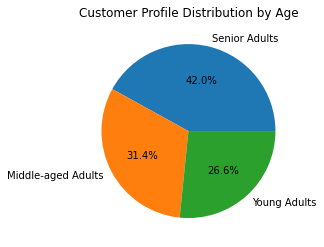

In [44]:
# create pie chart 
age_profile_pie = all_merged['age_group'].value_counts().plot.pie(title = 'Customer Profile Distribution by Age', label = '', autopct='%1.1f%%' )


In [45]:
# export the pie chart
age_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_pie.png'))

### Income

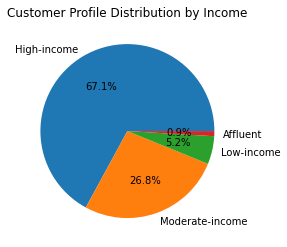

In [46]:
# create pie chart
income_profile_pie = all_merged['income_group'].value_counts().plot.pie(title = 'Customer Profile Distribution by Income', label = '', autopct='%1.1f%%')

In [47]:
# export the pie chart
income_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_pie.png'))

### Family Status

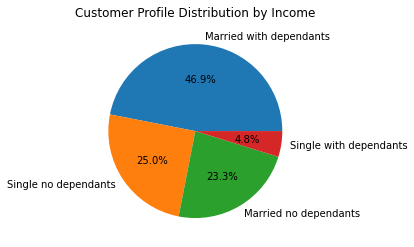

In [48]:
# create pie chart
family_profile_pie = all_merged['family_group'].value_counts().plot.pie(title = 'Customer Profile Distribution by Income', label = '', autopct='%1.1f%%')

In [49]:
# export the pie chart
family_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_pie.png'))

## Department Profiles

### Order DOW by family groups

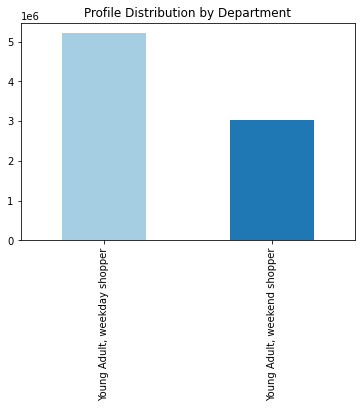

In [50]:
# create bar chart
dept_bar = all_merged['age_shop_flag'].value_counts().plot.bar(title = 'Profile Distribution by Department', color = sns.color_palette('Paired'))

In [51]:
#export visualisation


### Order DOW by Age groups

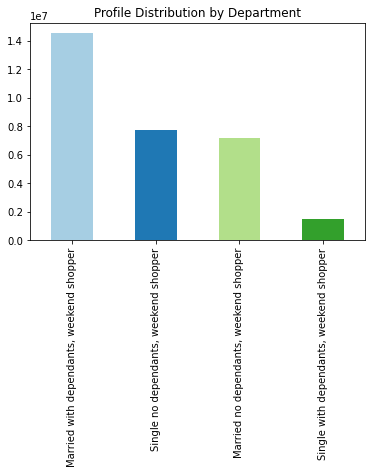

In [52]:
# create bar chart
dept_bar = all_merged['family_shop_flag'].value_counts().plot.bar(title = 'Profile Distribution by Department', color = sns.color_palette('Paired', 11))

In [53]:
#export visualisation


## Q7. Descriptive Statistics
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## Customer Profiles

### Age

In [54]:
# dow family profile statistics

all_merged.groupby('age_group').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices             \
                                     min       mean   max    min       mean   
age_group                                                                     
Middle-aged Adults                   0.0  10.795478  30.0    1.0  11.738511   
Senior Adults                        0.0  10.812868  30.0    1.0  11.952305   
Young Adults                         0.0  10.823742  30.0    1.0  12.133971   

                             
                        max  
age_group                    
Middle-aged Adults  99999.0  
Senior Adults       99999.0  
Young Adults        99999.0

### Income

In [55]:
# dow income profile statistics

all_merged.groupby('income_group').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices              \
                                  min       mean   max    min        mean   
income_group                                                                
Affluent                          0.0  10.131962  30.0    1.0  255.719326   
High-income                       0.0  10.776709  30.0    1.0   10.657057   
Low-income                        0.0  11.273673  30.0    1.0    6.502895   
Moderate-income                   0.0  10.828861  30.0    1.0    7.635482   

                          
                     max  
income_group              
Affluent         99999.0  
High-income      99999.0  
Low-income          25.0  
Moderate-income  14900.0

### Family Status

In [56]:
# dow family profile statistics

all_merged.groupby('family_group').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices  \
                                          min       mean   max    min   
family_group                                                            
Married no dependants                     0.0  10.814660  30.0    1.0   
Married with dependants                   0.0  10.823959  30.0    1.0   
Single no dependants                      0.0  10.791951  30.0    1.0   
Single with dependants                    0.0  10.750995  30.0    1.0   

                                             
                              mean      max  
family_group                                 
Married no dependants    11.626527  99999.0  
Married with dependants  12.102113  99999.0  
Single no dependants     12.102657  99999.0  
Single with dependants   10.890167  99999.0

## Department Profiles

### Order DOW by family groups

In [57]:
# dow family profile statistics

all_merged.groupby('family_shop_flag').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order             \
                                                           min       mean   
family_shop_flag                                                            
Married no dependants, weekend shopper                     0.0  10.814660   
Married with dependants, weekend shopper                   0.0  10.823959   
Single no dependants, weekend shopper                      0.0  10.791951   
Single with dependants, weekend shopper                    0.0  10.750995   

                                               prices                      
                                           max    min       mean      max  
family_shop_flag                                                           
Married no dependants, weekend shopper    30.0    1.0  11.626527  99999.0  
Married with dependants, weekend shopper  30.0    1.0  12.102113  99999.0  
Single no dependants, weekend shopper     30.0    1.0  12.102657  99999.0  
Single with dependants, weekend shopper   30.0    1.0  10.890167  99999.0

### Order DOW by Age groups

In [58]:
# dow family profile statistics

all_merged.groupby('age_shop_flag').agg({'days_since_last_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_last_order                  prices  \
                                               min       mean   max    min   
age_shop_flag                                                                
Young Adult, weekday shopper                   0.0  10.612838  30.0    1.0   
Young Adult, weekend shopper                   0.0  11.187079  30.0    1.0   

                                                  
                                   mean      max  
age_shop_flag                                     
Young Adult, weekday shopper  12.176270  99999.0  
Young Adult, weekend shopper  12.061307  99999.0

## Q8. Region and Deaprtment Profiles
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Age based Region Profile and Department Profile

In [59]:
# create a crosstab between the "Regions and age groups
crosstb_region_age = pd.crosstab(all_merged['region'], all_merged['age_group'], normalize ='index', dropna = False)
crosstb_region_age

age_group,Middle-aged Adults,Senior Adults,Young Adults
region,,,
Midwest,0.319117,0.417595,0.263289
Northeast,0.308618,0.422735,0.268648
South,0.312975,0.418533,0.268492
West,0.314529,0.421332,0.264139


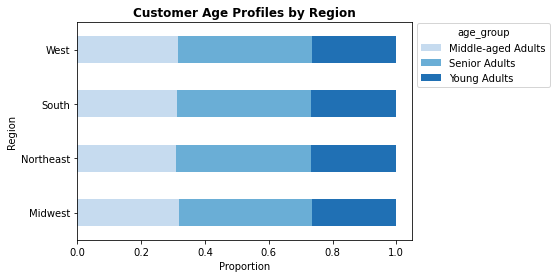

In [60]:
# Visualisations
# create the visualization of Age Profiles by Region
region_age = crosstb_region_age.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))

# customize the plot
plt.xlabel('Proportion')
plt.ylabel('Region')
plt.title('Customer Age Profiles by Region', fontweight='bold')
plt.legend(title ='age_group', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

In [61]:
# export visualisation
region_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_age.png'))

In [62]:
# create a crosstab between the department and age groups

crosstb_dept_age = pd.crosstab(all_merged['department_id'], all_merged['age_group'], normalize ='columns', dropna = False)
crosstb_dept_age

age_group,Middle-aged Adults,Senior Adults,Young Adults
department_id,,,
1,0.068499,0.068785,0.068132
2,0.001096,0.001101,0.001146
3,0.036212,0.036157,0.036242
4,0.293257,0.293466,0.292771
5,0.004633,0.004566,0.004879
6,0.008309,0.008162,0.008384
7,0.082970,0.083710,0.082139
8,0.002949,0.003019,0.003050
9,0.026495,0.026523,0.026660


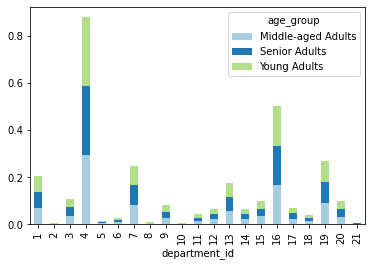

In [63]:
#Visualisation, stacked bar graph
department_age =crosstb_dept_age.plot.bar(stacked = True, color = sns.color_palette('Paired', 11))


In [64]:
# export the visualisation
department_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age_bar.png'))

### Income based Region Profile and Department Profile

In [65]:
# create a crosstab between the "Regions and age groups
crosstb_region_income = pd.crosstab(all_merged['region'], all_merged['income_group'], normalize ='index', dropna = False)
crosstb_region_age

age_group,Middle-aged Adults,Senior Adults,Young Adults
region,,,
Midwest,0.319117,0.417595,0.263289
Northeast,0.308618,0.422735,0.268648
South,0.312975,0.418533,0.268492
West,0.314529,0.421332,0.264139


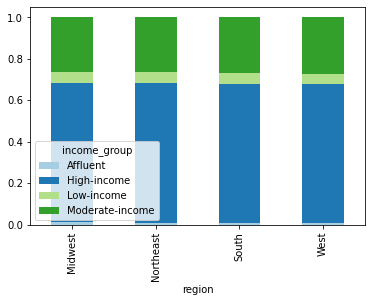

In [66]:
# Visualisations
region_income = crosstb_region_income.plot.bar(stacked = True,color = sns.color_palette('Paired', 11))

In [67]:
# export visualisation
region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income_bar.png'))

In [68]:
# create a crosstab between the department and age groups

crosstb_dept_income = pd.crosstab(all_merged['department_id'], all_merged['income_group'], normalize ='columns', dropna = False)

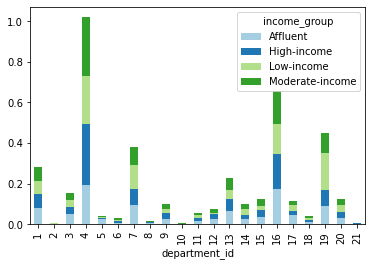

In [69]:
#Visualisation
department_income = crosstb_dept_income.plot.bar(stacked = True,color = sns.color_palette('Paired', 11))

In [70]:
# export the viz
department_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_income.png'))

### Family based Region Profile and Department Profiles

In [71]:
# create a crosstab between the "Regions and age groups
crosstb_region_family = pd.crosstab(all_merged['region'], all_merged['family_group'], normalize ='index', dropna = False)
crosstb_region_age

age_group,Middle-aged Adults,Senior Adults,Young Adults
region,,,
Midwest,0.319117,0.417595,0.263289
Northeast,0.308618,0.422735,0.268648
South,0.312975,0.418533,0.268492
West,0.314529,0.421332,0.264139


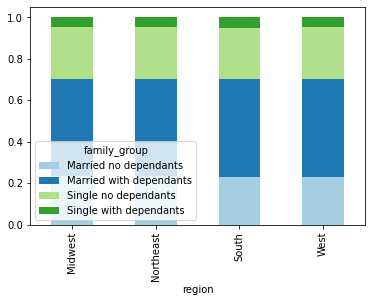

In [72]:
# Visualisations
region_family = crosstb_region_family.plot.bar(stacked = True, color = sns.color_palette('Paired', 11))

In [73]:
# export visualisation
region_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_family.png'))

In [74]:
# create a crosstab between the department and age groups
# create a crosstab between the "department" column and "age_flag" column
crosstb_dept_family = pd.crosstab(all_merged['department_id'], all_merged['family_group'], normalize ='columns', dropna = False)
crosstb_dept_age

age_group,Middle-aged Adults,Senior Adults,Young Adults
department_id,,,
1,0.068499,0.068785,0.068132
2,0.001096,0.001101,0.001146
3,0.036212,0.036157,0.036242
4,0.293257,0.293466,0.292771
5,0.004633,0.004566,0.004879
6,0.008309,0.008162,0.008384
7,0.082970,0.083710,0.082139
8,0.002949,0.003019,0.003050
9,0.026495,0.026523,0.026660


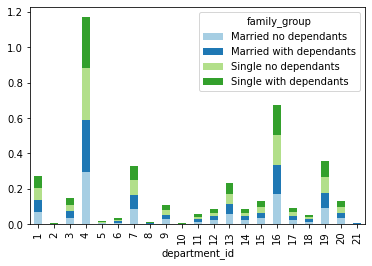

In [75]:
#Visualisation
department_family = crosstb_dept_family.plot.bar(stacked = True, color = sns.color_palette('Paired', 11))

In [76]:
# export visualisation
department_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_family.png'))

## Department- Segmentation Profile

### Department ID by Region

In [77]:
# Creating a crosstab comparing "Department_ID" and "Region", and looking at percentages for better compatibility
region_department = pd.crosstab(all_merged['department_id'], all_merged['region'], normalize = 'index')

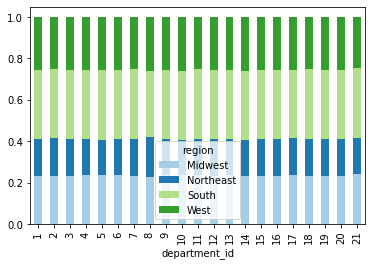

In [78]:
# create the visualization of Department Profiles by Region
region_department = region_department.plot.bar(stacked = True, color = sns.color_palette('Paired', 11))

In [79]:
# Export Visualisation

region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_bar.png'))

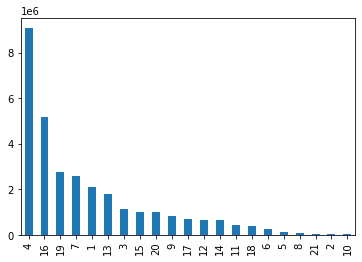

In [88]:
# Department ID bar chart

departmentid_bar = all_merged['department_id'].value_counts().plot.bar()

In [89]:
# Export Visualisation

departmentid_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departmentid_bar.png'))

## Final Dataset Export

In [ ]:
#export final dataset
all_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_final_set.pkl'))